<a href="https://colab.research.google.com/github/Sajrudin/EDA_Project/blob/main/EDA_IPL_Matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis On IPL Matches Dataset

**Project  : AI-ML ->  EDA**

**Presented By : Sajrudin Aalam**

---


# Project Summary
This project focuses on Exploratory Data Analysis (EDA) of the IPL matches dataset to uncover insights and patterns. The analysis includes examining match outcomes, team performances, toss decisions, and player statistics across multiple seasons. Various visualizations were used to highlight trends such as most successful teams, venues with the highest wins, and player contributions. The findings provide a comprehensive understanding of factors influencing match results and can help in strategic decision-making for teams and fans.

**GitHub Link -**

**Objective** - Perform EDA on IPL matches dataset to get insights and patterns for model training.

# Coding Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/GNCIPL_Internship_Projects/matches.csv"
dataset = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
# Making a copy of dataset
df = dataset.copy()

# Displaying first 5 rows of dataset
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
# Checking the shape of dataset
print(df.shape)

# Printing the columns of the dataset
print(f'Columns of the dataset are : \n {df.columns.tolist()}')

(1095, 19)
Columns of the dataset are : 
 ['id', 'season', 'city', 'date', 'match_type', 'player_of_match', 'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin', 'target_runs', 'target_overs', 'super_over', 'umpire1', 'umpire2']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  umpire1       

In [ ]:
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


# Data Preprocessing

In [ ]:
# Checking missing values
df.isnull().sum()

,0
id,0
season,0
city,51
date,0
match_type,0
player_of_match,5
venue,0
team1,0
team2,0
toss_winner,0


# Handling Missing Values

In [ ]:
# Removing 'method' column as the missing values are more than 5%
df.drop('method', axis=1, inplace=True)

In [ ]:
# Handling missing values for the numerical data
columns_to_fill = ['result_margin', 'target_runs', 'target_overs']

for col in columns_to_fill:
    df[col].fillna(df[col].mean(), inplace=True)

# Handling missing values for the categorical data

df['city'].fillna(df['city'].mode()[0], inplace=True)
df['player_of_match'].fillna('No Award', inplace=True)
df['winner'].fillna('No Result', inplace=True)

In [ ]:
print(df.isnull().sum().sum())

0


In [ ]:
# Checking duplicate values
df.duplicated().sum()

np.int64(0)

# Checking the correctness of datatype

In [ ]:
print(df.dtypes)

id                   int64
season              object
city                object
date                object
match_type          object
player_of_match     object
venue               object
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
target_runs        float64
target_overs       float64
super_over          object
umpire1             object
umpire2             object
dtype: object


In [ ]:
# Converting object datatype to date datatype
df['date'] = pd.to_datetime(df['date'])



df['season'] = df['season'].astype(str)

# Extracting  year for the season
df['season_year'] = df['season'].str[:4].astype(int)

In [ ]:
df.drop('season', axis=1, inplace=True)

In [ ]:
df.head()

,id,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,season_year
0,335982,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2007
1,335983,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri,2007
2,335984,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2007
3,335985,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper,2007
4,335986,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan,2007


# Checking Outliers

Displaying Boxplot for checking outliers:


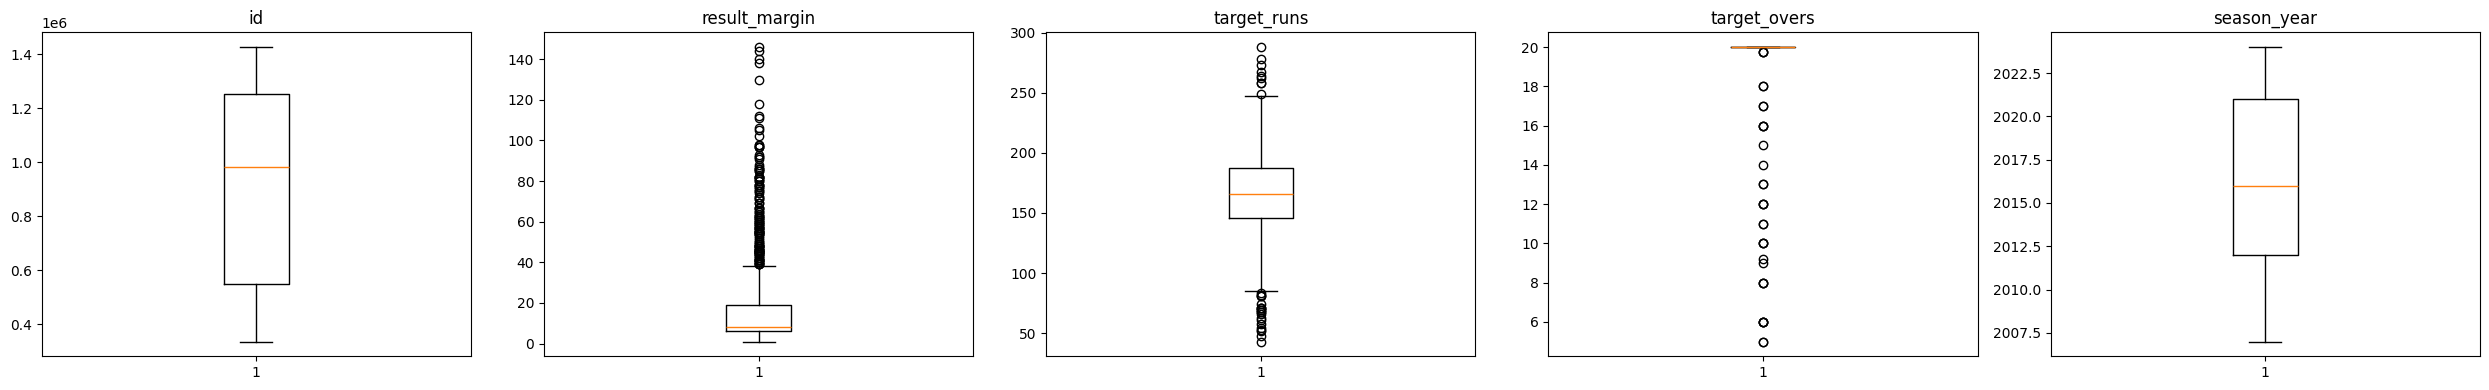

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Displaying Boxplot for checking outliers:")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(5 * len(numeric_cols), 4))

# If there is only one numeric column, axes won't be iterable
if len(numeric_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, numeric_cols):
    ax.boxplot(df[col].dropna())
    ax.set_title(col)

plt.tight_layout()
plt.show()


From the boxplots, it is evident that the columns ['id', 'season_year'] do not have any significant impact on the predictive modeling process, so we can ignore outliers in these columns. For the columns ['result_margin', 'target_runs', 'target_overs'], there are several visible outliers; however, these values are part of actual match outcomes and represent rare but valid scenarios (e.g., very high winning margins, low target overs due to rain-shortened matches). Hence, we will retain these outliers to preserve the true distribution of the data and maintain the authenticity of the dataset for modeling.

# Feature Engineering

In [ ]:
# Updating the data to map old team names to new names
df_updated = df.copy()

# Dictionary to map old team names to new ones
team_name_map = {
    "Delhi Daredevils": "Delhi Capitals",
    "Kings XI Punjab": "Punjab Kings",
    "Royal Challengers Bangalore": "Royal Challengers Bengaluru",
    'Rising Pune Supergiant' : 'Rising Pune Supergiants'
}

# Apply mapping to relevant columns
df_updated['team1'] = df_updated['team1'].replace(team_name_map)
df_updated['team2'] = df_updated['team2'].replace(team_name_map)
df_updated['winner'] = df_updated['winner'].replace(team_name_map)


In [ ]:
df_updated['team1'].unique()

array(['Royal Challengers Bengaluru', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Pune Warriors', 'Sunrisers Hyderabad', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Lucknow Super Giants',
       'Gujarat Titans'], dtype=object)

In [ ]:
#Adding a columns containing team names abbrevation
team_name_map = {
    'Chennai Super Kings': 'CSK',
    'Delhi Capitals': 'DC',
    'Punjab Kings': 'PBKS',
    'Kolkata Knight Riders': 'KKR',
    'Mumbai Indians': 'MI',
    'Rajasthan Royals': 'RR',
    'Royal Challengers Bengaluru': 'RCB',
    'Sunrisers Hyderabad': 'SRH',
    'Kochi Tuskers Kerala': 'KTK',
    'Pune Warriors': 'PW',
    'Rising Pune Supergiants': 'RPS',
    'Gujarat Lions': 'GL',
    'Gujarat Titans': 'GT',
    'Deccan Chargers': 'DCs',
    'Lucknow Super Giants': 'LSG'
}


df_updated['winner_abb'] = df_updated['winner'].replace(team_name_map)

In [ ]:
df_updated.head()

,id,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,...,result,result_margin,target_runs,target_overs,super_over,umpire1,umpire2,season_year,team_score,winner_abb
0,335982,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bengaluru,Kolkata Knight Riders,Royal Challengers Bangalore,field,...,runs,140.0,223.0,20.0,N,Asad Rauf,RE Koertzen,2007,222.0,KKR
1,335983,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,...,runs,33.0,241.0,20.0,N,MR Benson,SL Shastri,2007,240.0,CSK
2,335984,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,...,wickets,9.0,130.0,20.0,N,Aleem Dar,GA Pratapkumar,2007,129.0,DC
3,335985,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,...,wickets,5.0,166.0,20.0,N,SJ Davis,DJ Harper,2007,165.0,RCB
4,335986,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,...,wickets,5.0,111.0,20.0,N,BF Bowden,K Hariharan,2007,110.0,KKR


# Analysing the Data to get insights

# Team Record Analysis

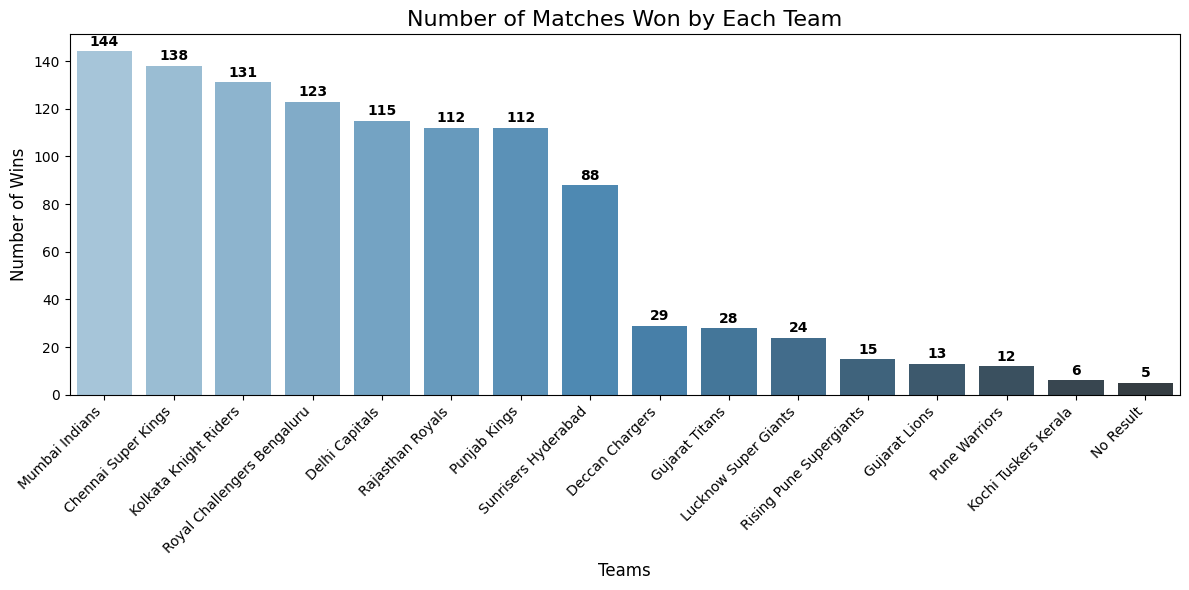

In [ ]:
# Count number of wins per team after merging names
team_wins = df_updated['winner'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=team_wins.index, y=team_wins.values, palette="Blues_d")

# Annotate bars with number of wins
for i, value in enumerate(team_wins.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Number of Matches Won by Each Team", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Number of Wins", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


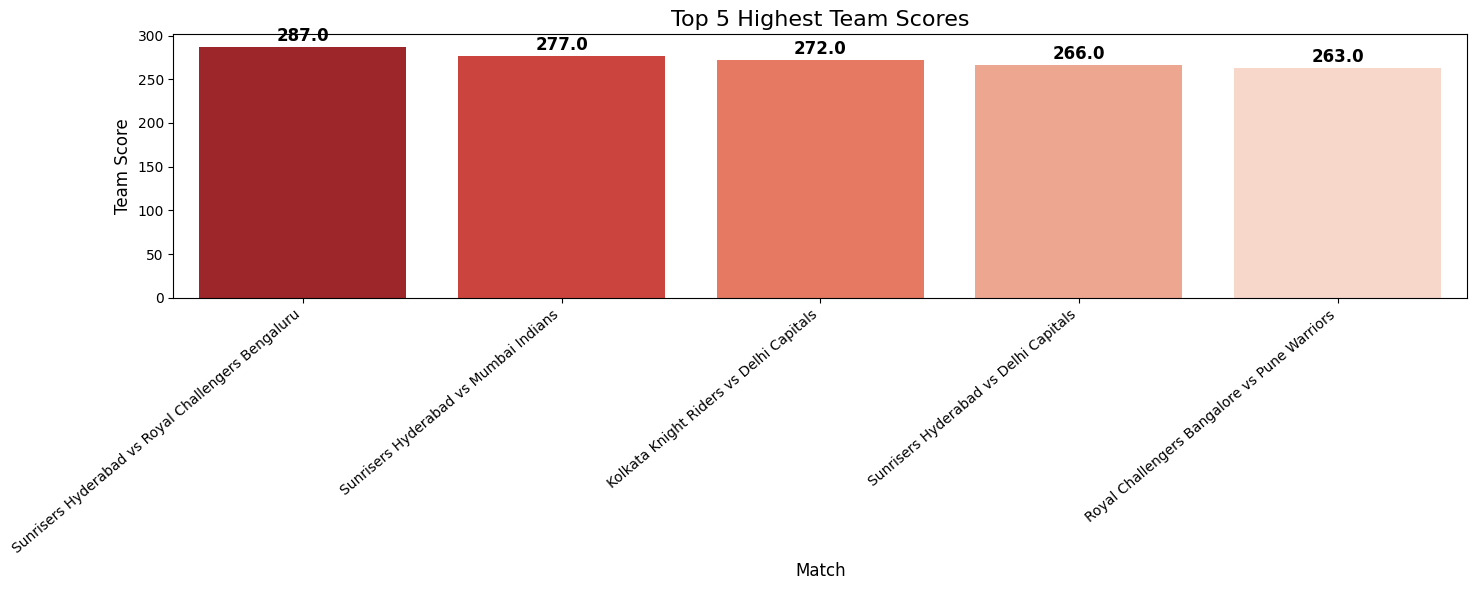

In [ ]:
# Displaying top 5 highest score by the respective teams


df_updated['team_score'] = df_updated['target_runs'] - 1
top_scores = df[['team1', 'team2', 'team_score', 'season_year']].nlargest(5, 'team_score')

# Create a new column to represent the match (team1 vs team2)
top_scores['match'] = top_scores['team1'] + " vs " + top_scores['team2']

# Plotting
plt.figure(figsize=(15, 6))
ax = sns.barplot(x='match', y='team_score', data=top_scores, palette="Reds_r")

# Annotate bars with score values
for i, value in enumerate(top_scores['team_score']):
    ax.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.title("Top 5 Highest Team Scores", fontsize=16)
plt.xlabel("Match", fontsize=12)
plt.ylabel("Team Score", fontsize=12)
plt.xticks(rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
df_updated.columns.tolist()

['id',
 'city',
 'date',
 'match_type',
 'player_of_match',
 'venue',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'winner',
 'result',
 'result_margin',
 'target_runs',
 'target_overs',
 'super_over',
 'umpire1',
 'umpire2',
 'season_year',
 'team_score',
 'winner_abb']

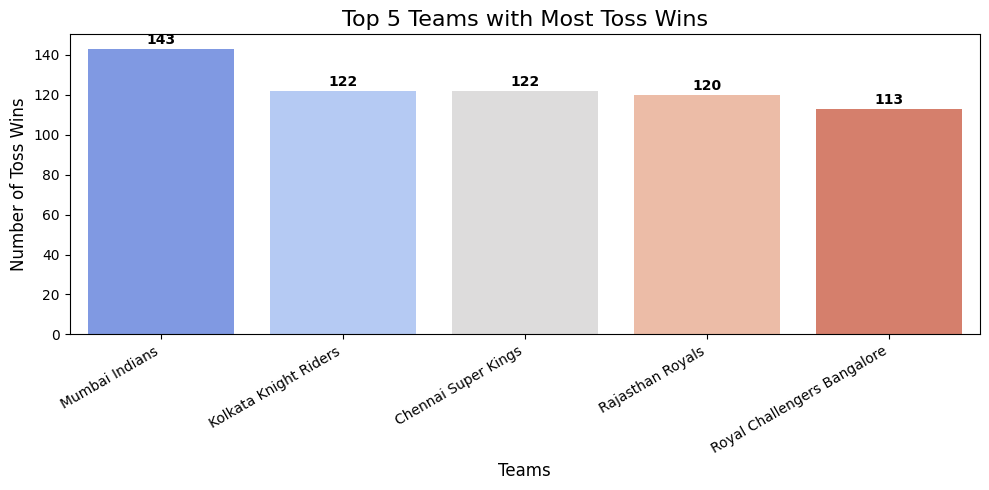

In [ ]:
# Top 5 Teams with most toss wins
# Count toss wins per team
toss_wins = df_updated['toss_winner'].value_counts().head(5)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=toss_wins.index, y=toss_wins.values, palette="coolwarm")

# Adding numbers on top of bars
for i, value in enumerate(toss_wins.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title("Top 5 Teams with Most Toss Wins", fontsize=16)
plt.xlabel("Teams", fontsize=12)
plt.ylabel("Number of Toss Wins", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

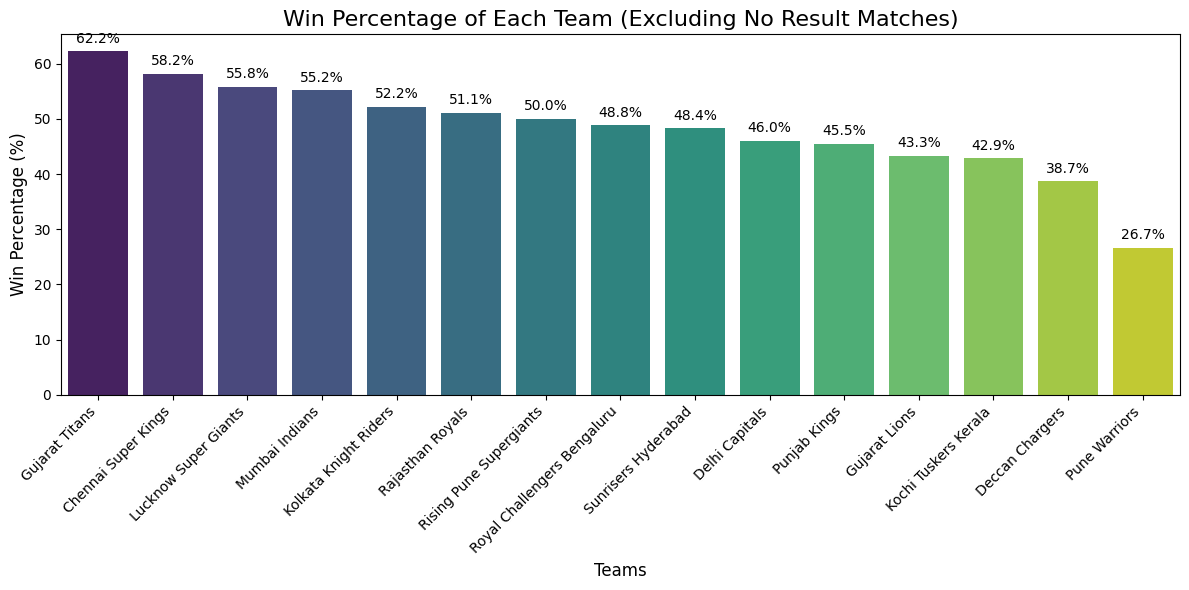

In [ ]:
# Filter out matches with 'No Result'
df_valid = df_updated[df_updated['winner'] != 'No Result']

# Calculate matches played per team (only matches with result)
matches_played = df_valid['team1'].value_counts() + df_valid['team2'].value_counts()

# Calculate win percentage
team_wins = df_valid['winner'].value_counts()
win_percentage = (team_wins / matches_played * 100).sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=win_percentage.index, y=win_percentage.values, palette="viridis")

# Add values on top of bars
for i, value in enumerate(win_percentage.values):
    plt.text(i, value + 1, f"{value:.1f}%", ha='center', va='bottom', fontsize=10)

plt.title("Win Percentage of Each Team (Excluding No Result Matches)", fontsize=16)
plt.ylabel("Win Percentage (%)", fontsize=12)
plt.xlabel("Teams", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


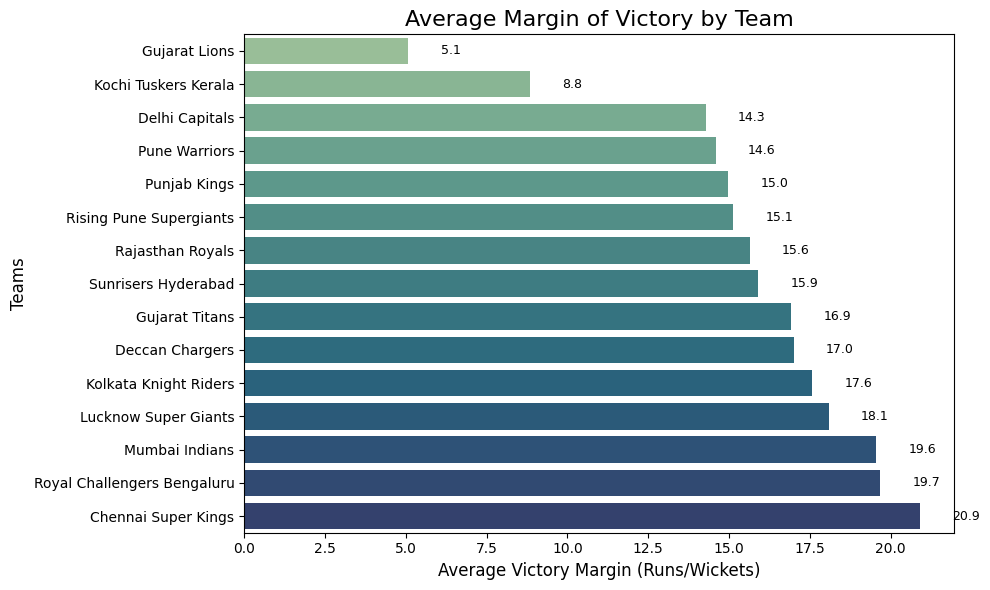

In [ ]:
# Filter valid results
df_valid = df_updated[(df_updated['winner'] != 'No Result') & (df_updated['result_margin'].notna())]

# Calculate average margin per team
avg_margin = df_valid.groupby('winner')['result_margin'].mean().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=avg_margin.values, y=avg_margin.index, palette="crest")

# Add values on bars
for i, value in enumerate(avg_margin.values):
    plt.text(value + 1, i, f"{value:.1f}", va='center', fontsize=9)

plt.title("Average Margin of Victory by Team", fontsize=16)
plt.xlabel("Average Victory Margin (Runs/Wickets)", fontsize=12)
plt.ylabel("Teams", fontsize=12)
plt.tight_layout()
plt.show()


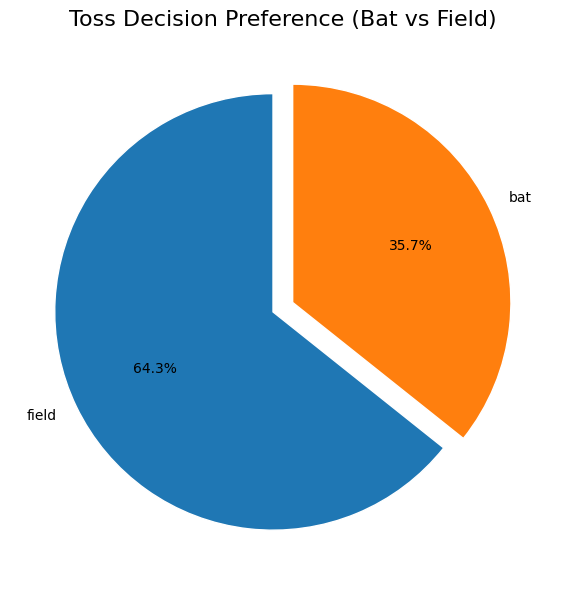

In [ ]:
# Count toss decision preference
toss_counts = df_updated['toss_decision'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(toss_counts, labels=toss_counts.index, autopct='%1.1f%%', startangle=90,
        wedgeprops={"edgecolor":"white"}, explode=[0.05, 0.05])

plt.title("Toss Decision Preference (Bat vs Field)", fontsize=16)
plt.tight_layout()
plt.show()


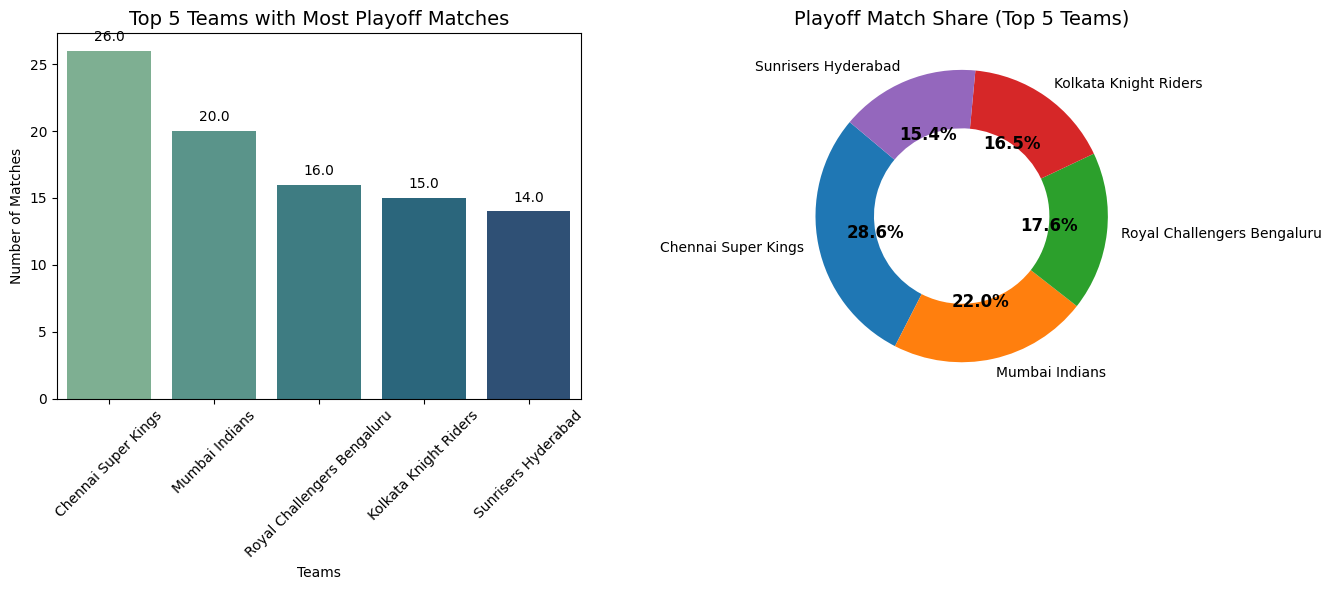

In [ ]:
# Showing top 5 teams with most playoff matches
playoff_matches = df_updated[df_updated['match_type'].str.contains('Semi Final|Final|3rd Place Play-Off|Qualifier 1|Elimination Final|Qualifier 2|Eliminator', case=False, na=False)]

# Count matches played by each team
playoff_counts = playoff_matches['team1'].value_counts() + playoff_matches['team2'].value_counts()
top_5_playoff_teams = playoff_counts.nlargest(5)

# Create figure with 2 subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Left: Vertical Bar Plot ---
sns.barplot(x=top_5_playoff_teams.index, y=top_5_playoff_teams.values, ax=axes[0], palette="crest")
axes[0].set_title("Top 5 Teams with Most Playoff Matches", fontsize=14)
axes[0].set_ylabel("Number of Matches")
axes[0].set_xlabel("Teams")
axes[0].tick_params(axis='x', rotation=45)

# Add value labels on top of bars
for i, value in enumerate(top_5_playoff_teams.values):
    axes[0].text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

# --- Right: Donut Chart ---
wedges, texts, autotexts = axes[1].pie(
    top_5_playoff_teams.values,
    labels=top_5_playoff_teams.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.4)
)

axes[1].set_title("Playoff Match Share (Top 5 Teams)", fontsize=14)
plt.setp(autotexts, size=12, weight="bold", color="black")

plt.tight_layout()
plt.show()

# Player Analysis

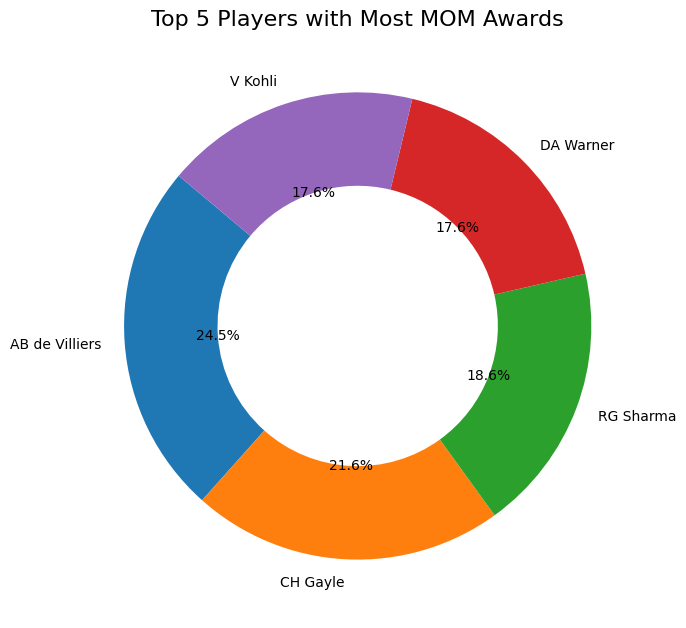

In [ ]:
# Top 5 players with most MOM awards
top_mom = df_updated['player_of_match'].value_counts().nlargest(5)

# Plot donut chart
plt.figure(figsize=(7,7))
plt.pie(top_mom.values, labels=top_mom.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width':0.4})

plt.title("Top 5 Players with Most MOM Awards", fontsize=16)
plt.tight_layout()
plt.show()


# Venue Analysis

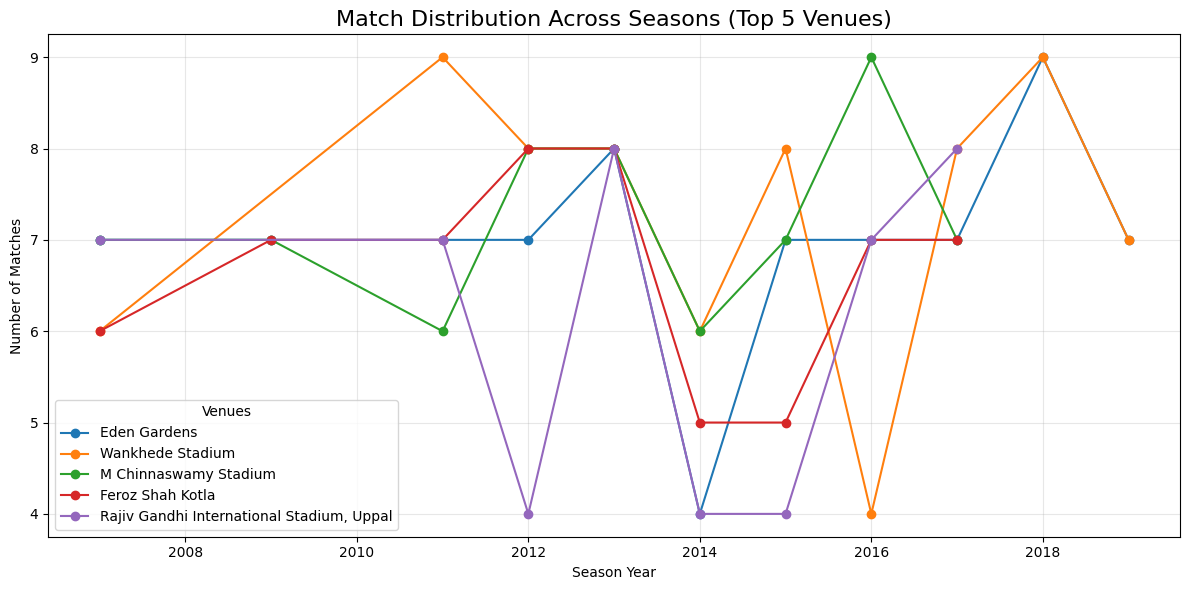

In [ ]:
venue_counts = df_updated['venue'].value_counts().head(10)
venue_season_counts = df_updated.groupby(['season_year', 'venue']).size().reset_index(name='match_count')

# Filter top 5 venues only for cleaner visualization
top_venues = venue_counts.head(5).index
filtered_data = venue_season_counts[venue_season_counts['venue'].isin(top_venues)]

plt.figure(figsize=(12, 6))
for venue in top_venues:
    venue_data = filtered_data[filtered_data['venue'] == venue]
    plt.plot(venue_data['season_year'], venue_data['match_count'], marker='o', label=venue)

plt.title("Match Distribution Across Seasons (Top 5 Venues)", fontsize=16)
plt.xlabel("Season Year")
plt.ylabel("Number of Matches")
plt.legend(title="Venues")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()